# Coursera Capstone Project
## The Battle of Neighborhoods 
### HEMAJA PATOJU - Part 1 : Introduction and Data Sections


### Coursera Capstone - REPORT CONTENT

#### Introduction Section : 
   Discussion of the business problem and the interested audience in this project.
#### Data Section: 
   Description of the data that will be used to solve the problem and the sources.
#### Methodology section: 
   Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
#### Results section: 
   Discussion of the results.
#### Discussion section: 
   Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
#### Conclusion section: 
   Report Conclusion.

### 1. Introduction: Business Problem
   Since the beginning of 2020, Jakarta and many other cities around the world have been under attack by an invisible army called ‘Novel Corona Virus’, also known as ‘Covid-19’. Every effort has been focusing on solving or minimizing problems, including Data Scientists. Data Scientists assessed the situations in places around the world, such as availability, amount, and geographical distribution (i.e. locations) of health infrastructures, such as virus testing centers and authorized hospitals to treat affected patients. In this article, we would like to present a simple analysis for determining strategic locations for the distribution of masks and medical devices for COVID-19 treatment, based on confirmed cases on May 28, 2020, and the red zone areas for “new normal” condition analysis.

### 2. Data
#### A few Identified factors that influence our decision are:
- Covid-19 cases per district “Riwayat File Covid-19 DKI Jakarta”
- Total population in DKI Jakarta 2020 statistik.jakarta.go.id
- 10 most population in DKI Jakarta 2020 per district statistik.jakarta.go.id
- Hospital for treatment covid-19 megapolitan.kompas.com

###### The following data sources are needed to extract/generate the required information:
- Processed covid-19 positive case data collection on 28 May 2020 At 09.00.
- The distribution of mask sales based on the population in the DKI Jakarta area.
- The distribution of mask sales based on 5 districts with the most densely populated populations.
- New datasets (to be created) from Hospital table that contains city, district, along with their latitudes and longitudes.

### Import necessary libraries

In [9]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping 

#!conda install -c conda-forge geocoder --yes
#print ("install geocoder")
#!conda install -c conda-forge/label/gcc7 geocoder --yes
#print ("install geocoder2")
#!conda install -c conda-forge/label/cf201901 geocoder --yes
#print ("install geocoder3")
#!conda install -c conda-forge/label/cf202003 geocoder --yes
#print ("install geocoder4")
#import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [68]:
CLIENT_ID = '5EN04EHC1WK135P3UEVZKOCR25FVIHPQ0UH24DWJTSYYUOPM' # your Foursquare ID
CLIENT_SECRET = '3GDNQJGT00SZXZTYMGEO52GTVOG2AWWNHHK5O021PHONZK0Z' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5EN04EHC1WK135P3UEVZKOCR25FVIHPQ0UH24DWJTSYYUOPM
CLIENT_SECRET:3GDNQJGT00SZXZTYMGEO52GTVOG2AWWNHHK5O021PHONZK0Z


#### Covid-19 cases per district.

In [11]:
# Read in the data Covid-19 cases per district (28 May,2020)
df_cases = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Standar%20Kelurahan%20Data%20Corona%20(28%20MEI%202020%20Pukul%2009.00).csv")
# View the top rows of the dataset
df_cases.head()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,NaN,TOTAL,30704,746,29958,9577,1005,8572,6929,2055,1719,514,2641,0.0
1,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,3723,107,3616,2584,272,2312,539,149,26,8,356,NaN
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,5706,342,5364,1638,229,1409,1329,499,382,71,377,NaN
3,3173061005,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,129,0,129,61,0,61,51,15,28,4,4,NaN
4,3174071006,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,7,0,7,13,0,13,17,0,16,0,1,NaN


In [12]:
df_cases.tail()

,ID_KEL,ID_KEL.1,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,ODP,Proses Pemantauan,Selesai Pemantauan,PDP,Masih Dirawat,Pulang dan Sehat,POSITIF,Dirawat,Sembuh,Meninggal,Self Isolation,Keterangan
265,3101021002,3101021002,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU TIDUNG,175,1,174,1,0,1,13,3,0,0,10,NaN
266,3173031008,3173031008,DKI JAKARTA,JAKARTA BARAT,TAMAN SARI,PINANGSIA,13,0,13,3,0,3,1,0,0,0,1,NaN
267,3174021001,3174021001,DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,15,0,15,7,0,7,3,2,1,0,0,NaN
268,3173041001,3173041001,DKI JAKARTA,JAKARTA BARAT,TAMBORA,TAMBORA,21,0,21,7,4,3,2,0,0,0,2,NaN
269,3101021001,3101021001,DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SELATAN,PULAU UNTUNG JAWA,20,0,20,0,0,0,0,0,0,0,0,NaN


In [14]:
df_cases.shape

(270, 18)

#### Total population data in DKI Jakarta 2020.

In [15]:
import pandas as pd
# Read in the data total population in DKI Jakarta 2020
df_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/population2020_DKI_Jakarta.csv")
# View the top rows of the dataset
df_population

,City,Total population 2020(people/km²)
0,Jakarta Pusat,23877
1,Jakarta Barat,19592
2,Jakarta Timur,16924
3,Jakarta Selatan,16600
4,Jakarta Utara,12409
5,Kep. Seribu,3334


In [16]:
df_population.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
print ("Total Polulation :", df_population['Total population 2020(people/km²)'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City                               6 non-null      object
 1   Total population 2020(people/km²)  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
Total Polulation : 92736


#### Data from 10 districts most pupulated in DKI Jakarta, 2020.

In [18]:
# Read in the data 10 most pupulation in DKI Jakarta 2020 per district
df_most_population = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/10_kelurahan%20terpadat_DKI_Jakarta.csv")
# View the top rows of the dataset
df_most_population

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343
5,Utan_Panjang,69559
6,Jembatan_Besi,67874
7,Keagungan,67717
8,Kampung_Melayu,66594
9,Karang_Anyar,65141


In [19]:
df_most_population.head()

,district,Total population 2020 (people/km²)
0,Kali_Anyar,95676
1,Kampung_Rawa,91441
2,Galur,89160
3,Tanah_Tinggi,77367
4,Kerendang,76343


#### According to the information update from Kompas.com (megapolitan.kompas.com), the following hospitals are the existing reference hospitals for Covid-19 testing in Jakarta area:
- RSPI Sulianti Saroso, Jakarta Utara
- RSUP Persahabatan, Jakarta Timur
- RSPAD Gatot Soebroto, Jakarta Pusat
- RSUP Fatmawati, Jakarta Selatan
- RSU Bhayangkara, Jakarta Timur
- RSAL Mintohardjo, Jakarta Pusat
- RSUD Cengkareng, Jakarta Barat
- RSUD Pasar Minggu, Jakarta Selatan
- RSKD Duren Sawit, Jakarta Timur
- RS Pelni, Jakarta Barat
- RSUD Tarakan, Jakarta Pusat
- RSUD Koja, Jakarta Utara
- RSU Pertamina Jaya, Jakarta Pusat

#### Data of covid hospitals in Jakarta

In [23]:
# Read in the data Hospital for treatment covid-19
df_hospital = pd.read_csv("https://raw.githubusercontent.com/cahyati/Coursera_Capstone/master/Hospital%20for%20treatment%20covid-19.csv")
# View the top rows of the dataset
print(" Total no of hospitals were: 13")
df_hospital.head()

 Total no of hospitals were: 13


,Hospital,City,District
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen
3,RSUP Fatmawati,Jakarta Selatan,Cilandak
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati


#### This sums up our data mining and data exploration section

### 3. Methodology

In [24]:
df_cases.columns

Index(['ID_KEL', 'ID_KEL.1', 'Nama_provinsi', 'nama_kota', 'nama_kecamatan',
       'nama_kelurahan', 'ODP', 'Proses Pemantauan', 'Selesai Pemantauan',
       'PDP', 'Masih Dirawat', 'Pulang dan Sehat', 'POSITIF', 'Dirawat',
       'Sembuh', 'Meninggal', 'Self Isolation', 'Keterangan'],
      dtype='object')

In [25]:
df_cases.drop(columns =["ID_KEL","ID_KEL.1", "Nama_provinsi", "nama_kecamatan", "ODP", "Proses Pemantauan", "Selesai Pemantauan", "PDP", "Masih Dirawat", "Pulang dan Sehat", "Dirawat", "Sembuh", "Meninggal", "Self Isolation", "Keterangan"], inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
1,BELUM DIKETAHUI,BELUM DIKETAHUI,539
2,LUAR DKI JAKARTA,LUAR DKI JAKARTA,1329
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17


In [26]:
indexNames = df_cases[(df_cases['nama_kelurahan'] == 'BELUM DIKETAHUI') | (df_cases['nama_kota'] == 'LUAR DKI JAKARTA')].index
df_cases.drop(indexNames, inplace=True)
df_cases.head()

,nama_kota,nama_kelurahan,POSITIF
0,NaN,TOTAL,6929
3,JAKARTA BARAT,PEGADUNGAN,51
4,JAKARTA SELATAN,SENAYAN,17
5,JAKARTA BARAT,KEBON JERUK,55
6,JAKARTA UTARA,KELAPA GADING TIMUR,37


In [99]:
# Rename columns name to English
df_cases = df_cases.rename(columns = {'nama_kota':'CITY', 'nama_kelurahan':'DISTRICT', 'POSITIF':'POSITIVE'})
df_cases.head()

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.284631,106.827015
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.166612,106.903732


In [28]:
# Get the number and the names of each municipality or city in Jakarta
df_cases['CITY'].unique()
print(df_cases['CITY'].unique())
np.array(['JAKARTA TIMUR', 'JAKARTA PUSAT', 'JAKARTA BARAT','JAKARTA SELATAN', 'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU'],dtype=object)
# Get the number of districts (i.e. counts) in Jakarta.
# Get the mean number of positive cases of each district in the city and the standard deviation
df_cases.describe()

[nan 'JAKARTA BARAT' 'JAKARTA SELATAN' 'JAKARTA UTARA' 'JAKARTA TIMUR'
 'JAKARTA PUSAT' 'KAB.ADM.KEP.SERIBU']


,POSITIVE
count,268.000000
mean,44.738806
std,422.522679
min,0.000000
25%,8.000000
50%,15.000000
75%,23.250000
max,6929.000000


In [30]:
df_cases.info()

# Get the number of total / confirmed POSITIVE cases in Jakarta per 28 May 2020
df_cases['POSITIVE'].sum()

print ("positive cases :", ((df_cases['POSITIVE'].sum()) - 6929))

# Group the data by CITY
df_cases_grp = df_cases.groupby(['CITY'])
df_cases_grp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 269
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CITY      267 non-null    object
 1   DISTRICT  268 non-null    object
 2   POSITIVE  268 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 8.4+ KB
positive cases : 5061


In [31]:

df_cases_grp['POSITIVE'].sum()

CITY
JAKARTA BARAT         1122
JAKARTA PUSAT          922
JAKARTA SELATAN        888
JAKARTA TIMUR         1162
JAKARTA UTARA          953
KAB.ADM.KEP.SERIBU      14
Name: POSITIVE, dtype: int64

In [33]:
!pip install geocoder

In [36]:
!pip install opencage

In [38]:
# Import required package for obtaining Latitude and Longitude of each cities
# Need to get Latitude & Longitude of Jakarta city and the districts
# Get API key from the service provider (Open Cage Geocode)
#!pip install opencage
from opencage.geocoder import OpenCageGeocode
key = 'ad971a9d9e6845a38fb7c505424d6d03'
geocoder = OpenCageGeocode(key)
query = 'Jakarta, Indonesia'  
results = geocoder.geocode(query)
# print (results)
# Isolate only the Latitude & Longitude of Jakarta from the Json file
lat = results[0]['geometry']['lat']
lng = results[0]['geometry']['lng']
print ('The Latitude and Longitude of Jakarta is {} and {} reprectively.'.format(lat, lng))

The Latitude and Longitude of Jakarta is -6.1753942 and 106.827183 reprectively.


### We use the API service from OpenCage Geocoder to obtain the latitude and longitude of all districts in Jakarta.

In [39]:
# Get latitude and longitude of all districts
list_lat = []   # create empty lists for latitude
list_long = []  # create empty lists for longitude
for index, row in df_cases.iterrows(): # iterate over rows in dataframe
    District = row['DISTRICT']       
    query = str(District)+', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    
df_cases['Latitude'] = list_lat   
df_cases['Longitude'] = list_long
df_cases

,CITY,DISTRICT,POSITIVE,Latitude,Longitude
0,NaN,TOTAL,6929,-6.284631,106.827015
3,JAKARTA BARAT,PEGADUNGAN,51,-6.131373,106.701338
4,JAKARTA SELATAN,SENAYAN,17,-6.226911,106.809920
5,JAKARTA BARAT,KEBON JERUK,55,-6.192572,106.769726
6,JAKARTA UTARA,KELAPA GADING TIMUR,37,-6.166612,106.903732
7,JAKARTA BARAT,TOMANG,42,-6.172725,106.797301
8,JAKARTA TIMUR,DUREN SAWIT,39,-6.234138,106.919247
9,JAKARTA BARAT,KALIDERES,41,-6.137006,106.701594
10,JAKARTA SELATAN,PONDOK PINANG,40,-6.275479,106.780403
11,JAKARTA TIMUR,PONDOK KELAPA,52,-6.241040,106.933153


### We also need to get the latitude and longitude of all Covid-19 testing centers in Jakarta that we have checked from the source

In [41]:
# Get the latitude and longitude of all of the specialist hospitals
list2_lat = []   # create empty lists for latitude
list2_long = []  # create empty lists for longitude
for index, row in df_hospital.iterrows(): # iterate over rows in dataframe
    hosp = row['Hospital']
    distr = row['District']       
    query = str(hosp) + ', ' + str(distr) + ', Jakarta'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list2_lat.append(lat)
    list2_long.append(long)
# create new columns from lists    
df_hospital['Latitude'] = list2_lat   
df_hospital['Longitude'] = list2_long
df_hospital.head()

,Hospital,City,District,Latitude,Longitude
0,RSPI Sulianti Saroso,Jakarta Utara,Tanjung Priok,-6.129834,106.862590
1,RSUP Persahabatan,Jakarta Timur,Pulo Gadung,-6.204693,106.884848
2,RSPAD Gatot Soebroto,Jakarta Pusat,Senen,-6.173000,106.841800
3,RSUP Fatmawati,Jakarta Selatan,Cilandak,-6.297550,106.783930
4,RSU Bhayangkara Said Sukanto,Jakarta Timur,Kramat Jati,-6.234440,106.786670


In [42]:
# Define the map object and then display using the specified latitude and longitude values
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=12)
map_jkt

### 4. Results

#### The population density in Jakarta.

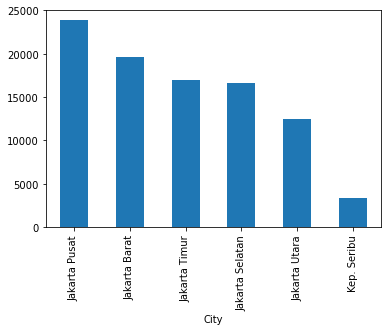

In [43]:
import matplotlib as plt

df_population.set_index('City')['Total population 2020(people/km²)'].plot.bar()

### The population density in Jakarta, per district

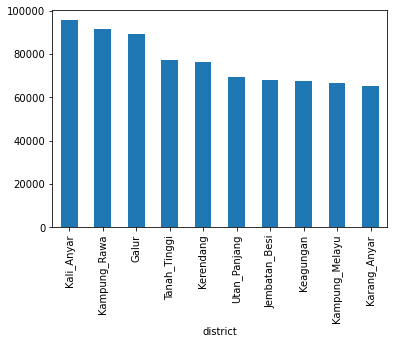

In [45]:
df_most_population.set_index('district')['Total population 2020 (people/km²)'].plot.bar()

Based on the graph results shown that areas need the distribution of masks the most is Central Jakarta (Jakarta Pusat) with the most populated areas. Then 5 districts that mostly need for a distribution of masks are Kali Anyar, Kampung Rawa, Galur, Tanah Tinggi, and Kerendang.

In [46]:
# Construct a map of all districts neighborhood in Jakarta 
map_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat, lng, label in zip(df_cases['Latitude'], df_cases['Longitude'], df_cases['DISTRICT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jkt)      
map_jkt

###### We can see from the above map, most of the districts are within the main outer ring roads surrounding the city, and others are situated outside the main ring roads. 
###### To solve in our business challenge, we need to show the extent and the distribution medical devices for treatment of COVID-19 positive case-patients within the city of Jakarta based on the number that we obtained from the government site.

In [57]:
# Plot a map of Covid-19 distribution in the city of Jakarta per May 28, 2020
map_covid_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         #color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_jkt)
print("This map will  present the data in a clear visual approach.")
map_covid_jkt

This map will  present the data in a clear visual approach.


We can see that most of the regions in Jakarta are now in the ‘RED’ zone, with the radius of the circle represent the relative extent of Covid-19 distribution in the City of Jakarta.

In [58]:
print("Another represenatation for proper view")
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
map_hosp = folium.Map(location=[-6.2, 106.8], zoom_start=12)
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_hosp)      
map_hosp

Another represenatation for proper view


In [59]:
# Plot a combined map of Covid-19 distribution in the city of Jakarta & current available testing centers
map_covid_hosp_jkt = folium.Map(location=[-6.2, 106.8], zoom_start=11)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_covid_hosp_jkt)
# Construct a map of all existing Covid-19 testing hospitals in Jakarta 
for lat, lng, hosp in zip(df_hospital['Latitude'], df_hospital['Longitude'], df_hospital['Hospital']):
    label = folium.Popup(hosp, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=hosp,
        icon=folium.Icon(color='blue', icon='header'),
        ).add_to(map_covid_hosp_jkt)      
map_covid_hosp_jkt

#### Finally, We can see from the results of the distribution of COVID-19 cases and the location of hospitals, almost all hospitals require a lot of medical equipment for COVID-19 treatment.

### 5. Discussion
#### The top 100 venues that are within Tarakan Hospital neighborhood and are within a radius of 500 meters of our candidate Covid-19 testing center using FOURSQUARE API.

In [61]:
prop_neighborhood = pd.DataFrame({
   'Hospital':['RSUD Tarakan']
})
neighborhood_latitude_list = []   # create empty lists for latitude
neighborhood_longitude_list = []  # create empty lists for longitude
for index, row in prop_neighborhood.iterrows(): # iterate over rows in dataframe
    neigh = row['Hospital']  
    query = str(neigh) + ', Jakarta Pusat'
    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    neighborhood_latitude_list.append(lat)
    neighborhood_longitude_list.append(long)
# create new columns from lists    
prop_neighborhood['Latitude'] = neighborhood_latitude_list   
prop_neighborhood['Longitude'] = neighborhood_longitude_list
prop_neighborhood

,Hospital,Latitude,Longitude
0,RSUD Tarakan,-6.171638,106.810346


In [77]:
# Define function that extracts the category of the venue based on the returned JSON file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
neighborhood_latitude = 0
neighborhood_longitude = 0
address = 'RSUD Tarakan, Jakarta Pusat'
geolocator = Nominatim(user_agent="Hospital_agent")
location = geolocator.geocode(address)
neighborhood_latitude= location.latitude
neighborhood_longitude= location.longitude
print("RSUD Tarakan: \n", "neighborhood_latitude:",neighborhood_latitude, ",\n", "neighborhood_longitude:",neighborhood_longitude)

RSUD Tarakan: 
 neighborhood_latitude: -6.1723055 ,
 neighborhood_longitude: 106.8106017


In [83]:
'''LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://www.coursera-capstone-battleofneighborhoods.com?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
 'HemajaPatoju', 
 'Hemaja@123', 
 VERSION, 
 neighborhood_latitude, 
 neighborhood_longitude, 
 radius, 
 LIMIT)
url'''
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius in meter
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
 CLIENT_ID, 
 CLIENT_SECRET, 
 VERSION, 
 neighborhood_latitude, 
 neighborhood_longitude, 
 radius, 
 LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=5EN04EHC1WK135P3UEVZKOCR25FVIHPQ0UH24DWJTSYYUOPM&client_secret=3GDNQJGT00SZXZTYMGEO52GTVOG2AWWNHHK5O021PHONZK0Z&v=20180604&ll=-6.1723055,106.8106017&radius=500&limit=100'

In [84]:
# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f9a90a7a106903c9498b19c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jakarta Pusat',
  'headerFullLocation': 'Jakarta Pusat, Jakarta',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': -6.167805495499996,
    'lng': 106.81511949188845},
   'sw': {'lat': -6.176805504500004, 'lng': 106.80608390811156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4cefe37b708060fc63b0f368',
       'name': 'Warung Nasi Bunda',
       'location': {'address': 'Jalan Cimanuk',
        'crossStreet': 'Jalan Ciujung',
        'lat': -6.171548514662123,
        'lng': 106.80887713345227,
        'labeledLat

#### Now,  we will use the above function (get_category_type) to extract information from the JSON file related to venues in the Tarakan Hospital neighborhood. 

In [86]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

<ipython-input-86-04de3e21b490>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877
1,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554
2,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314
3,Suan Thai,Thai Restaurant,-6.173744,106.811701
4,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754


In [87]:
# Check how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare for {} neighborhood.'.format(nearby_venues.shape[0], prop_neighborhood.iloc[0,0]))

28 venues were returned by Foursquare for RSUD Tarakan neighborhood.


#### Locate the business site around Tarakan hospital and identify affected business locations in the red zone.

In [88]:
# Sort venues around Tarakan Hospital area
df_tarakan_neigh = nearby_venues.groupby('categories').count()
df_tarakan_neigh.drop(columns =['lat', 'lng'], inplace=True)
df_tarakan_neigh.sort_values(by='name', ascending=False, inplace=True)
df_tarakan_neigh1 = df_tarakan_neigh.iloc[0:14]
df_tarakan_neigh2 = df_tarakan_neigh.iloc[14:]
df_tarakan_neigh1.reset_index()

,categories,name
0,Indonesian Restaurant,7
1,Coffee Shop,3
2,Fast Food Restaurant,3
3,Hotel,3
4,Camera Store,2
5,American Restaurant,1
6,Asian Restaurant,1
7,Bookstore,1
8,Breakfast Spot,1
9,Convenience Store,1


#### Now, we need to tackle is to gain slightly more insights (profile) of the Tarakan hospital area. 
#### To simplify our analysis, we will just use the Euclidian (distance-based) clustering technique which is part of the unsupervised machine learning technique. 
In particular, we will use K-means clustering.

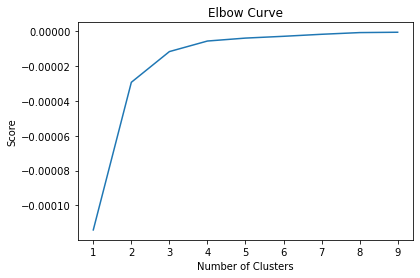

In [89]:
import matplotlib.pyplot as plt
# Apply unsupervised Machine Learning clustering technique to the neighborhood data in Tarakan Hospital
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = nearby_venues[['lat']]
X_axis = nearby_venues[['lng']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### The curve starts flattening out at K=3. So K=3 is the best possible value to cluster neighborhoods surrounding our proposed Covid-19 testing center. 

In [93]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(nearby_venues[nearby_venues.columns[2:4]]) # Compute k-means clustering.
nearby_venues['cluster_label'] = kmeans.fit_predict(nearby_venues[nearby_venues.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(nearby_venues[nearby_venues.columns[2:4]]) # Labels of each point
print("Assigning Cluster label to all venues that are within a 500-meter radius of our Covid-19 testing center in Tarakan Hospital area.")
nearby_venues

Assigning Cluster label to all venues that are within a 500-meter radius of our Covid-19 testing center in Tarakan Hospital area.


,name,categories,lat,lng,cluster_label
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,2
1,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,1
2,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,0
3,Suan Thai,Thai Restaurant,-6.173744,106.811701,0
4,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,0
5,Petrof Piano,Music Venue,-6.172733,106.811713,0
6,Starbucks,Coffee Shop,-6.175441,106.812220,1
7,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,2
8,Sate Khas Senayan,Indonesian Restaurant,-6.175524,106.812054,1
9,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,0


In [94]:
# Check whether all the cluster labels exist in the data
list(nearby_venues['cluster_label'].unique())

[2, 1, 0]

#### Assigning different colors to each cluster.

In [96]:
def regioncolors(counter):
    if counter['cluster_label'] == 0:
        return 'green'
    elif counter['cluster_label'] == 1:
        return 'blue'
    elif counter['cluster_label'] == 2:
        return 'red'
    else:
        return 'error'
nearby_venues["color"] = nearby_venues.apply(regioncolors, axis=1)
nearby_venues

,name,categories,lat,lng,cluster_label,color
0,Warung Nasi Bunda,Indonesian Restaurant,-6.171549,106.808877,2,red
1,Bubur Ayam Musi,Breakfast Spot,-6.174420,106.809554,1,blue
2,McDonald's Cideng,Fast Food Restaurant,-6.173391,106.811314,0,green
3,Suan Thai,Thai Restaurant,-6.173744,106.811701,0,green
4,Kopi Kebut Nitro Bar,Coffee Shop,-6.173219,106.811754,0,green
5,Petrof Piano,Music Venue,-6.172733,106.811713,0,green
6,Starbucks,Coffee Shop,-6.175441,106.812220,1,blue
7,Pondok Aroma Laut,Seafood Restaurant,-6.171484,106.808930,2,red
8,Sate Khas Senayan,Indonesian Restaurant,-6.175524,106.812054,1,blue
9,favehotel Tanah Abang - Cideng,Hotel,-6.173586,106.811802,0,green


In [97]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Tarakan = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Tarakan)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Tarakan)
    
map_Tarakan

In [98]:
# Construct a map of neighborhood venues in Tarakan Hospital, Cetral Jakarta 
map_Redzone = folium.Map(location=[-6.17163765, 106.81034620548138], zoom_start=16)
for lat, lng, cat, col in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['color']):
    label = folium.Popup(cat, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=cat,
        icon=folium.Icon(color=col),
        ).add_to(map_Redzone)      
for lat, lng, neigh in zip(prop_neighborhood['Latitude'], prop_neighborhood['Longitude'], prop_neighborhood['Hospital']):
    label = folium.Popup(neigh, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=neigh,
        icon=folium.Icon(color='darkblue', icon='header'),
        ).add_to(map_Redzone)
for lat,lon,area,size in zip(df_cases['Latitude'],df_cases['Longitude'],df_cases['DISTRICT'],df_cases['POSITIVE']):
     folium.CircleMarker(
         location=[lat, lon],
         popup=area,
         radius=size/2,
         color='r',
         opacity=0.5,
         fill=True,
         fill_opacity=0.5,
         fill_color='red',
         ).add_to(map_Redzone)
    
map_Redzone

#### The result of analysis is the location of the business which is in the Tarakan hospital neighborhood and is within a radius of 500 meters. 
#### Then, we also get the most congested cluster if businesses apply normal conditions in the red zone, potentially increasing cases of contracting the COVID-19 virus within the area.

### 5. Discussion

- The project aims to provide information to local people who must be alerted to go out of the house from the distribution of the COVID-19 case in Jakarta. 
    It also aims to provide information on areas that are most needed for a lot of mask distribution, according to population density in the area.
- Further, it provides information on which hospitals that need the most medical equipments for COVID-19 treatment, possibly even additional medical personnels (doctors and nurses). 
    It also provides information on the business neighborhood which shall implement Covid-19 health protocol with a high discipline when “new normal” comes.

### 6. Conclusion

- This project helps mask sellers to understand potential distribution areas according to population density in Jakarta. 
- It also helps the distribution of medical devices for corona care to hospitals that are estimated to have a large number of patients or even helps analyzing which hospitals need additional medical personnel (doctors and nurses).
- It will also provide awareness to help business owners who run businesses surrounding the adjacent clusters to be better informed, with the density of people within the business neighborhood.